In [1]:

import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("/home/root1/Desktop/linear_reg.csv")
df

,Hours,Scores
0,3,3.0
1,4,1.0
2,1,4.0
3,2,5.0
4,4,2.0
5,6,3.3
6,3,2.6


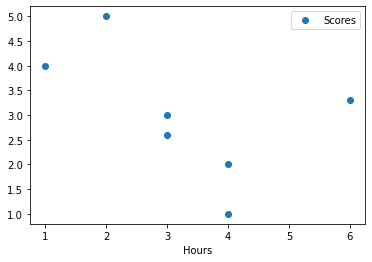

In [5]:
df.plot(x="Hours", y="Scores", style="o")
plt.show()


In [6]:
x_mean = df["Hours"].mean()
y_mean = df["Scores"].mean()
print(x_mean, y_mean)

3.2857142857142856 2.985714285714286


In [17]:
df["x"] = df["Hours"] - x_mean
df["y"] = df["Scores"] - y_mean
df["x*y"] = df["x"] * df["y"]
df["x^2"] = df["x"]**2
df["y^2"] = df["y"]**2
df


,Hours,Scores,x,y,x*y,x^2,y^2,y_prediction
0,3,3.0,-0.285714,0.014286,-0.004082,0.081633,0.000204,3.098148
1,4,1.0,0.714286,-1.985714,-1.418367,0.510204,3.943061,2.704630
2,1,4.0,-2.285714,1.014286,-2.318367,5.224490,1.028776,3.885185
3,2,5.0,-1.285714,2.014286,-2.589796,1.653061,4.057347,3.491667
4,4,2.0,0.714286,-0.985714,-0.704082,0.510204,0.971633,2.704630
5,6,3.3,2.714286,0.314286,0.853061,7.367347,0.098776,1.917593
6,3,2.6,-0.285714,-0.385714,0.110204,0.081633,0.148776,3.098148


In [8]:
summation_x_y = df["x*y"].sum()
summation_x_squared = df["x^2"].sum()
summation_y_squared = df["y^2"].sum()
print(summation_x_y, summation_x_squared, summation_y_squared)


-6.071428571428573 15.428571428571429 10.248571428571429


In [9]:
correlation = summation_x_y / (summation_x_squared * summation_y_squared)**0.5
correlation


-0.4828323564451766

In [10]:

def getMean(numbers):
    if len(numbers) == 0:
        return None
    else:
        current_sum = 0
        for i in numbers:
            current_sum += i
            current_avg = current_sum/len(numbers)
        return current_avg

In [11]:
def getStandardDeviation(numbers):
    if len(numbers) == 0:
        return 0
    else:
        mean = getMean(numbers)
        std_deviation = 0
        for i in numbers:
            std_deviation += (i - mean)**2
        return (std_deviation/len(numbers))**0.5


In [12]:

std_deviation_x = getStandardDeviation(df["x"].tolist())
std_deviation_y = getStandardDeviation(df["y"].tolist())
print(std_deviation_x, std_deviation_y)


1.4846149779161806 1.2099924101634114


In [13]:

m = correlation * (std_deviation_y / std_deviation_x)
m


-0.3935185185185186

In [14]:
c = df["Scores"].mean() - m * df["Hours"].mean()
c

4.278703703703704

In [15]:

df["y_prediction"] = m * df["Hours"] + c
df


,Hours,Scores,x,y,x*y,x^2,y^2,y_prediction
0,3,3.0,-0.285714,0.014286,-0.004082,0.081633,0.000204,3.098148
1,4,1.0,0.714286,-1.985714,-1.418367,0.510204,3.943061,2.704630
2,1,4.0,-2.285714,1.014286,-2.318367,5.224490,1.028776,3.885185
3,2,5.0,-1.285714,2.014286,-2.589796,1.653061,4.057347,3.491667
4,4,2.0,0.714286,-0.985714,-0.704082,0.510204,0.971633,2.704630
5,6,3.3,2.714286,0.314286,0.853061,7.367347,0.098776,1.917593
6,3,2.6,-0.285714,-0.385714,0.110204,0.081633,0.148776,3.098148


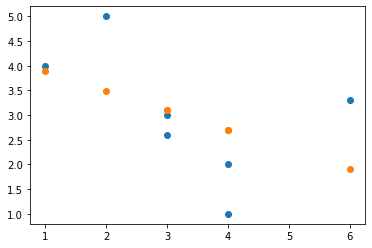

In [16]:
plot1 = plt.scatter(df["Hours"], df["Scores"])
plot2 = plt.scatter(df["Hours"], df["y_prediction"])
plt.show()
